In [382]:
import xarray as xr
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL,'en_US')
dataset = xr.open_dataset('MiningProcess_Flotation_Plant_Database.h5', engine = 'h5netcdf')
df = dataset.to_pandas()


In [383]:

df = df.resample('1h').mean()


In [384]:
df_input_feed = df.iloc[:,:2]
df_process_variables = df.iloc[:,2:-2]
df_output_feed = df.iloc[:,-2:]

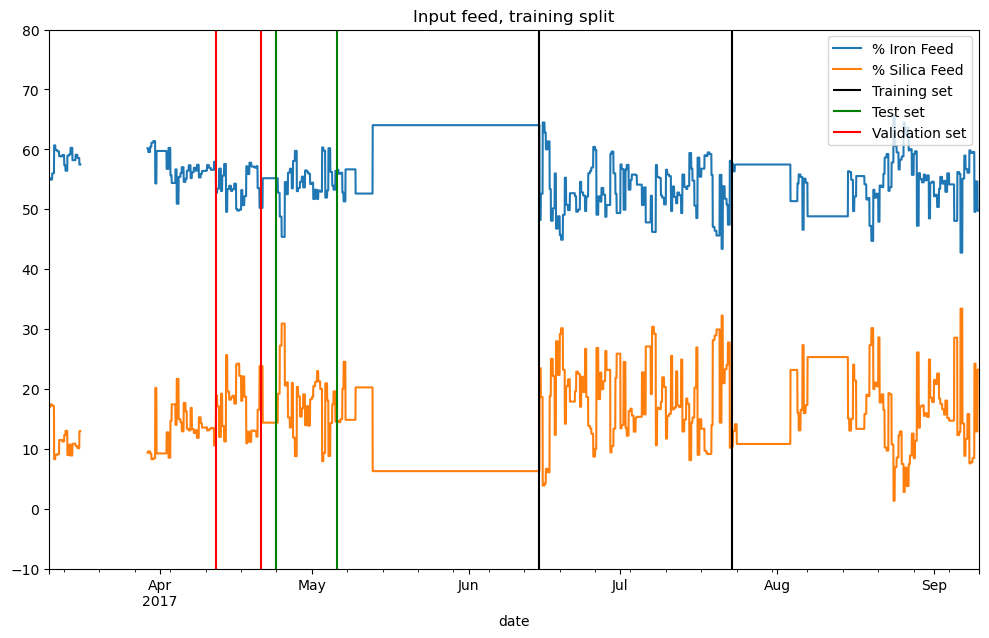

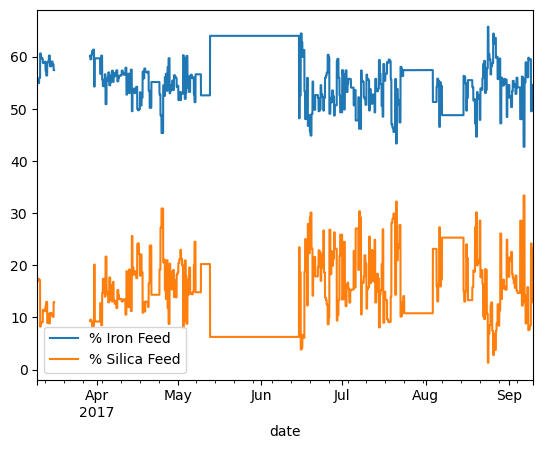

In [385]:
from matplotlib import pyplot as plt

df_input_feed.plot(figsize=(12,7))
plt.vlines('20170615',-10,80,colors='k',label='Training set')
plt.vlines('20170723',-10,80,colors='k')
plt.ylim(-10,80)
plt.title('Input feed, training split')
plt.legend()

plt.vlines(['20170424','20170506'],-10,80,colors='g',label='Test set')
plt.vlines(['20170412','20170421'],-10,80,colors='r',label='Validation set')

plt.legend(loc=1)
df_input_feed.plot()
# df_output_feed.plot()

df_train = df['20170615':'20170723']
df_test = df['20170424':'20170506']
df_validation = df['20170424':'20170506']

Starch Flow                       2
Amina Flow                        2
Ore Pulp Flow                     2
Ore Pulp pH                      11
Ore Pulp Density                  3
Flotation Column 01 Air Flow      7
Flotation Column 02 Air Flow      7
Flotation Column 03 Air Flow      7
Flotation Column 04 Air Flow    460
Flotation Column 05 Air Flow    460
Flotation Column 06 Air Flow      8
Flotation Column 07 Air Flow      8
Flotation Column 01 Level         4
Flotation Column 02 Level         2
Flotation Column 03 Level         2
Flotation Column 04 Level         2
Flotation Column 05 Level         3
Flotation Column 06 Level         2
Flotation Column 07 Level         2
dtype: int64

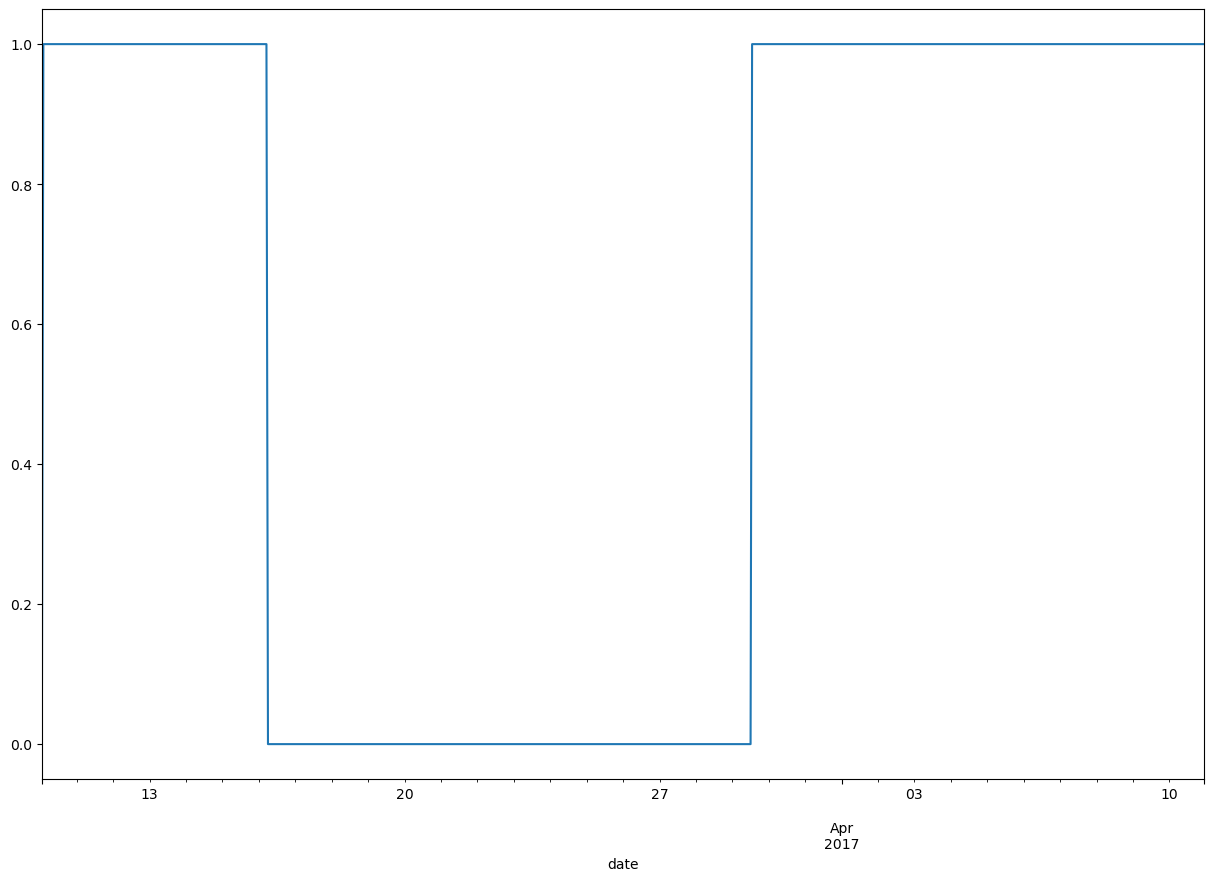

In [386]:
from matplotlib import pyplot as plt


df_missing = df_process_variables == df_process_variables.shift()

(df_missing.loc[:'20170410','Flotation Column 05 Air Flow']*1).plot(figsize=(15,10))

df_missing.sum()


In [387]:

df_train = df['20170615':'20170723']
df_test = df['20170424':'20170506']
df_validation = df['20170412':'20170421']

In [388]:
## Normalization here:

In [389]:
# Save each DataFrame into the HDF5 file under different keys
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    store.put('train_data', df_train)
    store.put('test_data', df_test)
    store.put('validation_data', df_validation)


In [390]:
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    df1_loaded = store.get('train_data')
    df2_loaded = store.get('test_data')
    df3_loaded = store.get('validation_data')

print(df1_loaded)
print(df2_loaded)
print(df3_loaded)

                     % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-06-15 00:00:00        64.03           6.26  3480.292789  449.924811   
2017-06-15 01:00:00        48.21          23.46  3700.329333  490.203261   
2017-06-15 02:00:00        48.21          23.46  3040.802142  468.486739   
2017-06-15 03:00:00        48.21          23.46  3133.105842  540.314011   
2017-06-15 04:00:00        48.21          23.46  2477.708153  448.150511   
...                          ...            ...          ...         ...   
2017-07-23 19:00:00        57.44          14.09  2874.076259  537.018194   
2017-07-23 20:00:00        57.44          14.09  2642.701681  501.404761   
2017-07-23 21:00:00        57.44          14.09  2389.803323  491.017589   
2017-07-23 22:00:00        57.44          14.09  3115.936082  484.235017   
2017-07-23 23:00:00        57.44          14.09  3356.331557  425.479100   

           

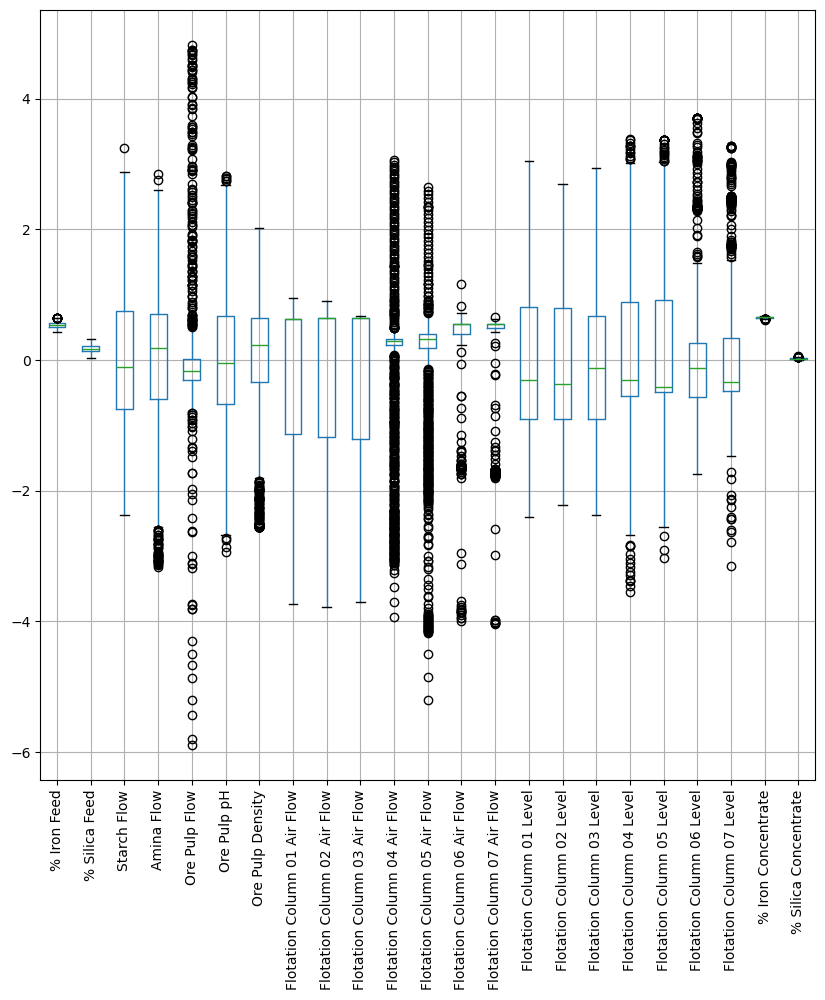

,% Iron Feed,% Silica Feed
date,,
2017-06-15 00:00:00,0.6403,0.0626
2017-06-15 01:00:00,0.4821,0.2346
2017-06-15 02:00:00,0.4821,0.2346
2017-06-15 03:00:00,0.4821,0.2346
2017-06-15 04:00:00,0.4821,0.2346
...,...,...
2017-04-21 19:00:00,0.5517,0.1435
2017-04-21 20:00:00,0.5517,0.1435
2017-04-21 21:00:00,0.5517,0.1435


In [402]:
from scipy.stats import zscore

def normalise_dataframe(df):
    df.iloc[:,:2] = df.iloc[:,:2]/100
    df.iloc[:,-2:] = df.iloc[:,-2:]/100
    df.iloc[:,2:-2] = zscore(df.iloc[:,2:-2])

df_norm = pd.concat((df_train,df_test,df_validation))






df_norm.boxplot(figsize=(10,10))

# zscore(df_test).boxplot(ax=axes[1])
# zscore(df_validation).boxplot(ax=axes[2])
plt.xticks(rotation = 90)


<Axes: xlabel='date'>

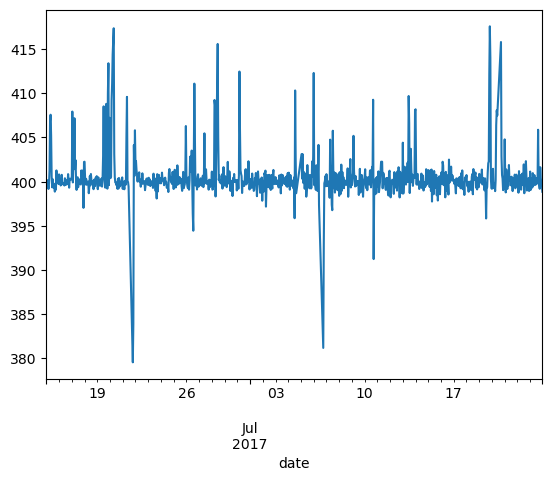

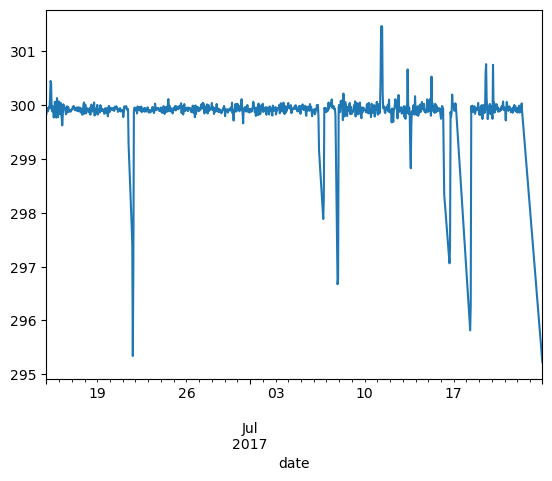

In [409]:
df_train['Ore Pulp Flow'].plot()
plt.figure()
df_train['Flotation Column 04 Air Flow'].plot()

<Axes: xlabel='date'>

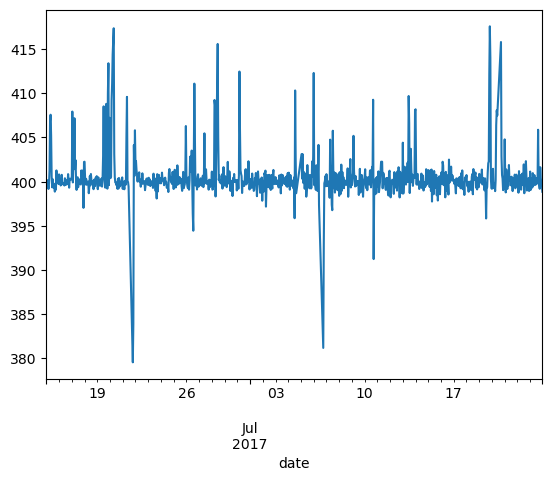

In [392]:
df_train['Ore Pulp Flow'].plot()